In [10]:
""" Importing all necessary Libraries """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns


class WorldBankData:
    
    def __init__(self, filename):
        self.filename = filename
        
    """This Function will get years from dataframe and return list of years"""
    def get_years(years_list):
        years = []
        for i in years_list:
            try:
                if len(i) == 4:
                    years.append(int(i))
            except:
                pass

        return years
        
    """This function will read data from filename which you will send as an argument of the class"""
    def read_data(self):
        data = pd.read_csv(self.filename)
        countries = data['Country Name']
        years_data = list(data)
        years = pd.DataFrame(get_years(years_data))

        _dict = {}
        for i in list(years[0]):
            _dict[str(i)] = data[str(i)]

        years_df = pd.DataFrame(_dict)
        
        return countries.head(), years_df.head()
    
    """This function will clean all the dataset by replacing Nan with 0"""
    def remove_null_values(self):
        df = pd.read_csv(self.filename)
        df = df.fillna(0)
        
        return df
    
    """This function will find corelation of all the dataset"""
    def find_correlations(self):
        df = pd.read_csv(self.filename)
        try:
            del df['Unnamed: 66']
        except:
            pass
        
        return df.corr()
    
    """This function will plot histogram on Country Name. You can change the column name"""
    def plot_histogram(self):
        df = pd.read_csv(self.filename)
        df = df.head(7000)
        
        plt.figure(figsize=(12,8))
        plt.hist(df["Country Name"])
        fig = plt.gcf()
        
    """This Function will plot histogram of every column present in the dataset"""
    def plot_histogram_columnwise(self):
        df = pd.read_csv(self.filename)
        df.hist(bins=50, figsize=(20, 15))
        
    """This Function will visualized data according to the GDP growth
    """
    def get_visualization(self):
#         plt.rcParams["figure.figsize"] = (30, 15)
        df = pd.read_csv(self.filename)
        df = df.head(7000)
        df = df.fillna(0)
        
        palette = sns.color_palette("Paired", 10)
        sns.set_palette(palette)
        
        #we take only data, not additional informations
        df = df[0:-5]
        #delete empty column
        del df['Unnamed: 66']
        #replace '..' string with nan values
        df.replace('..', np.nan, inplace=True)
        
        col_list = df.columns[4:].values
        df[col_list]=df[col_list].apply(pd.to_numeric)
        #reindex all table, create pivot view
        pv2 = pd.pivot_table(df,index=['Indicator Name','Country Code'], dropna=False, fill_value=0.0)
        # set the years
        pv2.columns = np.arange(1960,2022)
        palette = sns.color_palette("Paired", 10)
        sns.set_palette(palette)

        pv2.loc['GDP (current US$)'].T.plot(alpha=1, rot=45)
        pv2.loc['GDP per capita (current US$)'].T.plot(alpha=0.8, rot=45)
        pv2.loc['GDP per capita (current US$)'].T.plot(alpha=0.75, rot=45)
        pv2.loc['GDP growth (annual %)'].T.plot(alpha=0.75, rot=45)


    """In this function I am firstly calculating mean values of all the rows 
       and then I am comparing those values with just one > condition and showing only those
       rows who do not have any nan value in the new column which i created during the condition.
       we can change the condition according to the requirement as condition is not properly mentioned 
       in the assignment doc, So I just put this comparison operator to show basic undertanding.
    """
    def perform_comparison(self):
        df = pd.read_csv(self.filename)
        df['mean'] = df.mean(axis=1)
        
        df['comparison'] = df['mean']
        df.loc[df['mean'] > df['mean'].iloc[0], 'comparison'] = None
        
        df = df[df['comparison'].notna()]
        
        return df
    
    """Here I performed one of the most popular statistic techniques on to the dataset which is linear regression
       technique. I performed simple linear regression technique here just to fulfill the need.
       Here i compared environment change from 1960 to 2020 with one target year which is 2021. At the end after
       algorithm applied it will give us the results of the predicted data after compare 2021 with all other
       years and mean_squared_error ratio.
    """
    def perform_statistical_technique(self):
        df = pd.read_csv(self.filename)
        try:
            del df['Unnamed: 66']
        except:
            pass
        df = df.fillna(0)
        
        features = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967','1968','1969','1970','1971','1972',
            '1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986',
            '1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000',
            '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014',
            '2015','2016','2017','2018','2019','2020']
        target = ['2021']

        X = df[features]
        y = df[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

        model = linear_model.LinearRegression()
        model = model.fit(y_train, X_train)
        predicted_data = model.predict(y_test)
        predicted_data = np.round_(predicted_data)

        MSE = mean_squared_error(X_test,predicted_data)
        PD = predicted_data
        
        return MSE, PD
    
    """The chart shows kt of CO2 equivalent of emissions by Guatemala, Honduras,
        Nicaragua, Panama, El Salvador, Costa Rica, and Belize. The horizontal axis
        ranges from 2000 to 2012 in increments of 1. The vertical axis ranges from 0 to
        70000 in increments of 10000"""
    def draw_linechart(self):
        df = pd.read_csv(self.filename)
        del df["Unnamed: 66"]
        df = df.fillna(0)

        countries = ["Guatemala", "Belize", "Panama","CostaRica","Nicaragua","Honduras","El Salvador"]
        ge_data = df.loc[df['Country Name'].isin(countries)]

        ge_data_m = ge_data.melt(id_vars='Country Name',
        value_vars = ge_data.columns[34:], var_name='Year',
        value_name = 'Emissions')

        sns.set_theme(style="darkgrid")
        ax = sns.lineplot(data=ge_data_m,x='Year', y='Emissions', hue='Country Name',
        palette="Dark2")
        l = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        fig = plt.gcf()
        fig.set_size_inches(30,10)



In [11]:
"""Creating object of the class"""

obj = WorldBankData('WDIData.csv')

In [10]:
"""Calling read_data Function"""

obj.read_data()

(0    Africa Eastern and Southern
 1    Africa Eastern and Southern
 2    Africa Eastern and Southern
 3    Africa Eastern and Southern
 4    Africa Eastern and Southern
 Name: Country Name, dtype: object,
    1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...       2012  \
 0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  16.511262   
 1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  32.224027   
 2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  20.525353   
 3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  66.303599   
 4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
 
         2013       2014       2015       2016       2017       2018  \
 0  16.966046  17.411737  17.808234  18.179760  18.558937  18.949636   
 1  32.046478  31.323579  33.312163  38.380433  39.754201  42.168241   
 2  19.461383  17.790698  16.553470  23.907897  24.624725  26.813900   
 3  66.49601

In [11]:
"""Calling remove_null_values Function"""

obj.remove_null_values()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,0.0,0.0,0.0
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,0.0,0.0,0.0
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,0.0,0.0,0.0
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,0.0,0.0,0.0
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [16]:
"""Calling find_correlations Function"""

corr = obj.find_correlations()
corr

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1960,1.000000,0.999259,0.997698,0.994702,0.992287,0.985155,0.980500,0.975014,0.971990,0.965294,...,0.574539,0.510850,0.478602,0.463654,0.453771,0.449864,0.383485,0.316832,0.245137,0.947404
1961,0.999259,1.000000,0.999349,0.997178,0.995214,0.989044,0.984907,0.979819,0.977195,0.971461,...,0.569523,0.506321,0.474450,0.459706,0.450524,0.446581,0.380482,0.313968,0.243018,0.948652
1962,0.997698,0.999349,1.000000,0.998974,0.997511,0.992387,0.988885,0.984494,0.982126,0.977257,...,0.561166,0.498717,0.467397,0.452928,0.444695,0.440664,0.374957,0.308871,0.239254,0.949577
1963,0.994702,0.997178,0.998974,1.000000,0.999473,0.996610,0.994180,0.990951,0.988952,0.985147,...,0.548840,0.487194,0.456600,0.441993,0.434961,0.430827,0.365570,0.300221,0.232908,0.950248
1964,0.992287,0.995214,0.997511,0.999473,1.000000,0.998391,0.996662,0.994090,0.992620,0.989357,...,0.542949,0.481700,0.451494,0.436804,0.430403,0.426335,0.361311,0.296336,0.230038,0.951090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.449864,0.446581,0.440664,0.430827,0.426335,0.418895,0.403478,0.395882,0.393191,0.381416,...,0.977399,0.992540,0.996464,0.996725,0.998997,1.000000,0.995841,0.981816,0.935618,0.999633
2018,0.383485,0.380482,0.374957,0.365570,0.361311,0.354165,0.339640,0.332529,0.330058,0.320038,...,0.957542,0.981510,0.988359,0.986519,0.991243,0.995841,1.000000,0.993981,0.960707,0.999786
2019,0.316832,0.313968,0.308871,0.300221,0.296336,0.289763,0.276614,0.270126,0.268022,0.259725,...,0.926193,0.959617,0.970399,0.966091,0.973524,0.981816,0.993981,1.000000,0.984127,0.999893
2020,0.245137,0.243018,0.239254,0.232908,0.230038,0.225302,0.215466,0.210613,0.209102,0.203177,...,0.856087,0.904165,0.919954,0.909170,0.921691,0.935618,0.960707,0.984127,1.000000,0.999973


#### As you see the results above vary between years from 1960 to 2021. It decreases continuously between times.

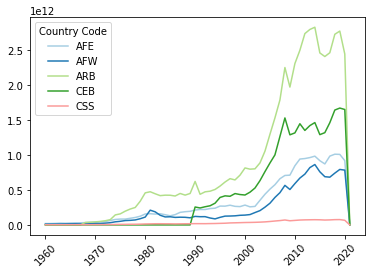

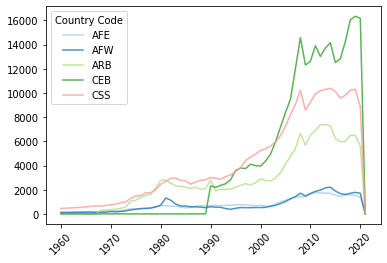

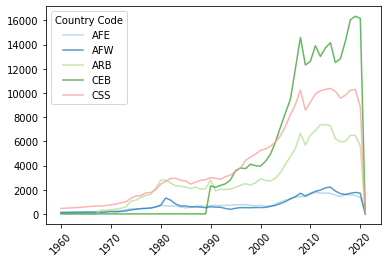

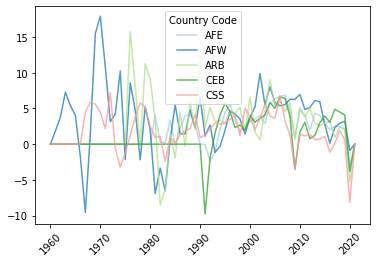

In [3]:
"""Calling get_visualization Function"""

obj.get_visualization()

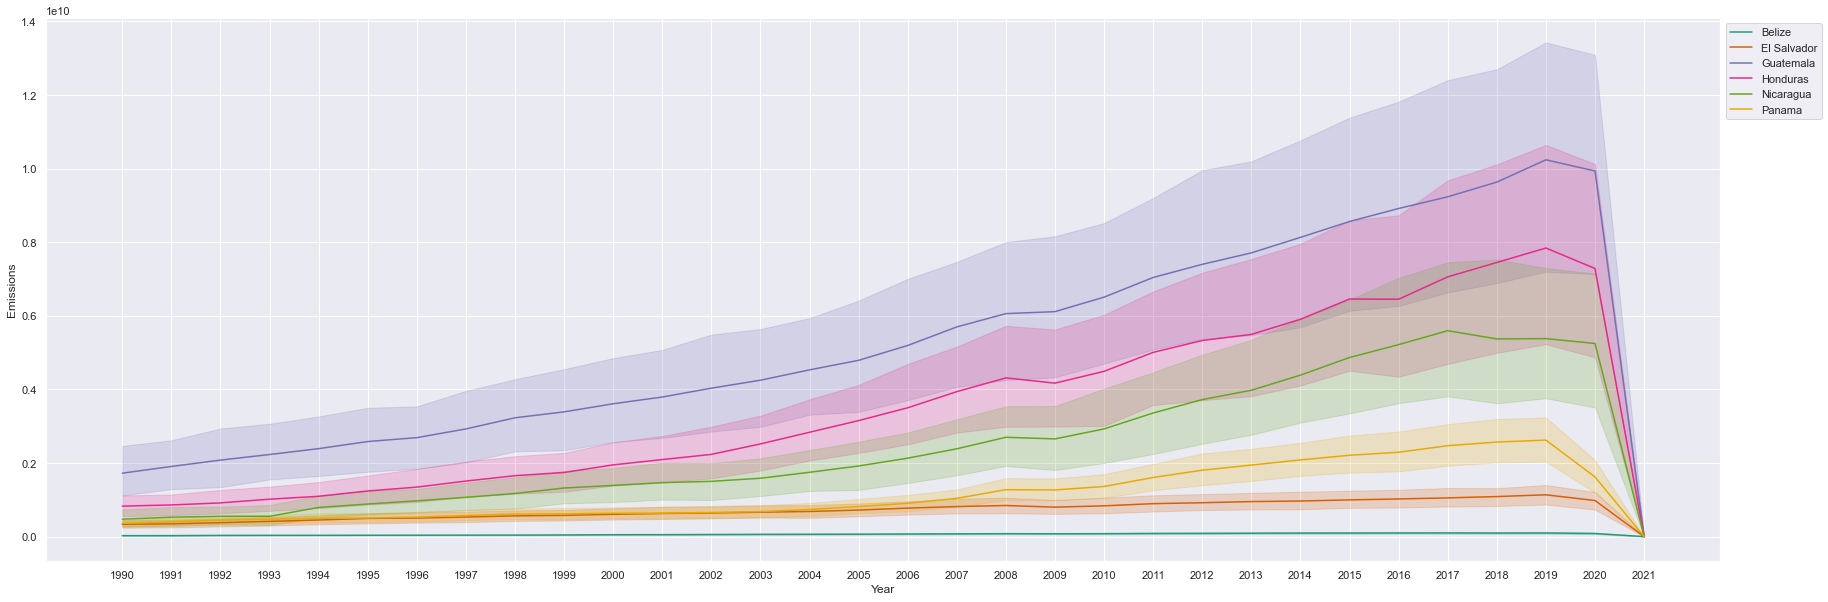

In [12]:
"""Calling plot_histogram Function"""

obj.draw_linechart()

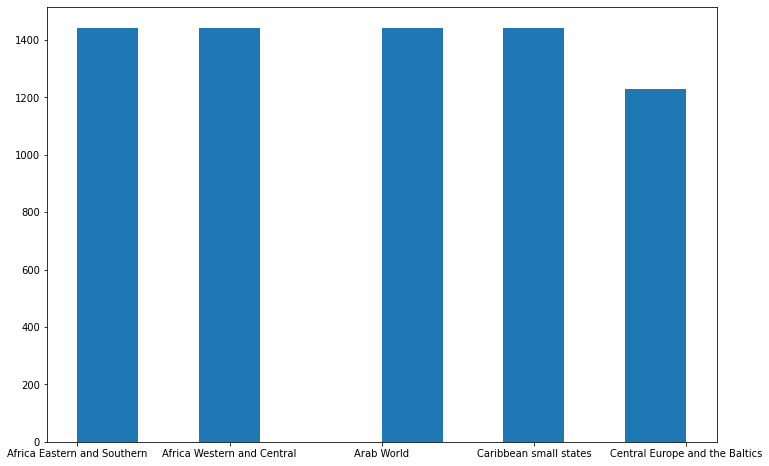

In [13]:
"""Calling plot_histogram Function"""

obj.plot_histogram()

#### As you see above graph is varrying from continent to continent. Mostly they are giving the same results but it will increase in the future.

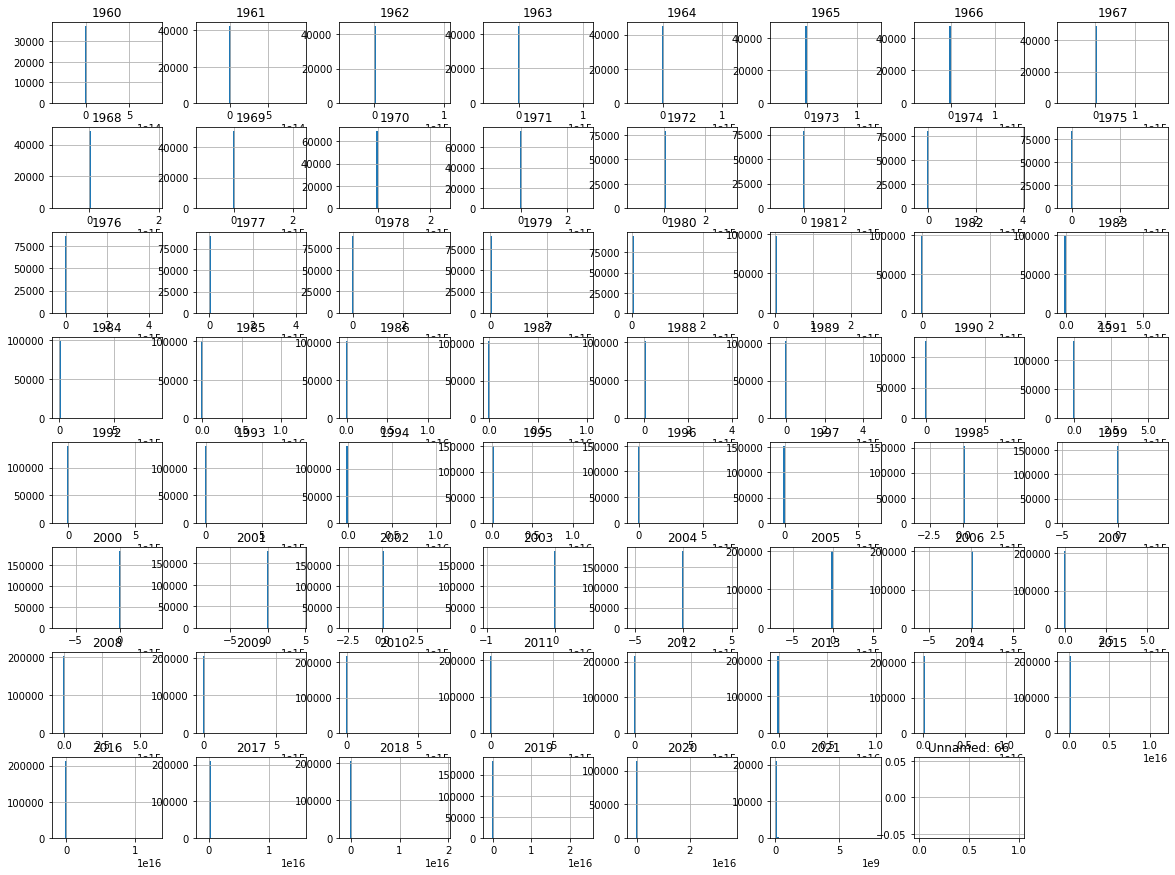

In [14]:
"""Calling plot_histogram_columnwise Function"""

obj.plot_histogram_columnwise()

#### As you see above there is detailed plotting of every year from 1960 to 2021. See how results varrying from year to year.

In [15]:
"""Calling perform_comparison Function"""

obj.perform_comparison()

/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:65: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66,mean,comparison
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN,NaN,15.404189,15.404189
20,Africa Eastern and Southern,AFE,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.074801,1.831276,3.065338,0.899447,5.842931,NaN,NaN,NaN,4.787284,4.787284
23,Africa Eastern and Southern,AFE,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.740293,-1.061477,1.259030,0.108222,1.802468,NaN,NaN,NaN,2.218737,2.218737
26,Africa Eastern and Southern,AFE,"Adjusted net savings, excluding particulate em...",NY.ADJ.SVNX.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.901965,4.849210,5.283510,4.427669,3.770944,NaN,NaN,NaN,5.301384,5.301384
28,Africa Eastern and Southern,AFE,"Adjusted net savings, including particulate em...",NY.ADJ.SVNG.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.911235,3.926023,4.415189,3.563133,2.939416,NaN,NaN,NaN,1.926865,1.926865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383814,Zimbabwe,ZWE,Value lost due to electrical outages (% of sal...,IC.FRM.OUTG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,NaN,7.450000,7.450000
383822,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.616667,3.616667
383823,Zimbabwe,ZWE,"Water productivity, total (constant 2015 US$ G...",ER.GDP.FWTL.M3.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.307054,NaN,NaN,NaN,NaN,NaN,6.415521,6.415521
383830,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.950000,9.950000


In [14]:
"""Calling perform_statistical_technique Function"""

obj.perform_statistical_technique()

(3.52140444954638e+27,
 array([[2.33914687e+10, 2.54646910e+10, 2.72648315e+10, ...,
         1.98090496e+12, 2.18790089e+12, 2.36901762e+12],
        [2.33914687e+10, 2.54646910e+10, 2.72648315e+10, ...,
         1.98090496e+12, 2.18790089e+12, 2.36901762e+12],
        [2.33914687e+10, 2.54646910e+10, 2.72648315e+10, ...,
         1.98090496e+12, 2.18790089e+12, 2.36901762e+12],
        ...,
        [2.33914687e+10, 2.54646910e+10, 2.72648315e+10, ...,
         1.98090496e+12, 2.18790089e+12, 2.36901762e+12],
        [2.33914687e+10, 2.54646910e+10, 2.72648315e+10, ...,
         1.98090496e+12, 2.18790089e+12, 2.36901762e+12],
        [2.33914687e+10, 2.54646910e+10, 2.72648315e+10, ...,
         1.98090496e+12, 2.18790089e+12, 2.36901762e+12]]))